# Loan Prediction: Automate the Loan Eligibility Process
Created by Imran Ture

## Step I - Frame the Problem
A company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
The data details are provided below:

**Variable**|**Description**
:-----|:-----
Loan_ID|Unique Loan ID
Gender|Male/ Female
Married|Applicant married (Y/N)
Dependents|Number of dependents
Education|Applicant Education (Graduate/Not Graduate)
Self_Employed|Self employed (Y/N)
ApplicantIncome|Applicant income
CoapplicantIncome|Coapplicant income
LoanAmount|Loan amount in thousands
Loan_Amount\_Term|Term of loan in months
Credit_History|Credit history meets guidelines
Property_Area|Urban/Semiurban/Rural
Loan_Status|Loan approved (Y/N)

## Step II - Read the Data

In [1]:
# Import libraries

## data analysis and wrangling
import pandas as pd
import numpy as np

## visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import seaborn as sbn
%matplotlib inline
from IPython.display import display

In [2]:
# Read the datasets (both training and test datasets)
df_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
combine_df = [df_train, df_test]

In [3]:
# Print the first 10 rows of both training and test datasets
print("")
print("training dataset")
display(df_train.head(10))
print('_'*100)
print("")
print("test dataset")
display(df_test.head(10))


training dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


____________________________________________________________________________________________________

test dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


## Step III - Process the Data

In [4]:
# Summarize the dataset using descriptive statistics
df_train.describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


However, only numerical values are summarized here. In order to include categorical values to this table, let's encode them.<br>After that we can get a better summary of dataset.

In [5]:
# Check what data types we have in the dataset
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# Remove Loan_ID from training dataset
df_train = df_train.drop(["Loan_ID"], axis = 1)

## Encoding Categorical Values

In [7]:
# Encode those categorical values (or values with object type)
encode_categorics = {"Gender": {"Male": 0, "Female": 1}, "Married": {"No": 0, "Yes": 1}, "Dependents": {"0": 0, "1": 1, "2": 2, "3+": 3}, "Education": {"Not Graduate": 0, "Graduate": 1}, "Self_Employed": {"No": 0,"Yes": 1}, "Property_Area": {"Rural": 0, "Semiurban": 1, "Urban": 2}, "Loan_Status": {"N": 0, "Y": 1}}

In [8]:
df_train.replace(encode_categorics, inplace = True)
display(df_train.head(10))

df_test.replace(encode_categorics, inplace = True)
display(df_test.head(10))

combine_df = [df_train, df_test]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,0.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1
6,0.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,2,1
7,0.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1,0
8,0.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,2,1
9,0.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1,0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,LP001022,0.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,2
4,LP001051,0.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2
5,LP001054,0.0,1,0.0,0,1.0,2165,3422,152.0,360.0,1.0,2
6,LP001055,1.0,0,1.0,0,0.0,2226,0,59.0,360.0,1.0,1
7,LP001056,0.0,1,2.0,0,0.0,3881,0,147.0,360.0,0.0,0
8,LP001059,0.0,1,2.0,1,NaN,13633,0,280.0,240.0,1.0,2
9,LP001067,0.0,0,0.0,0,0.0,2400,2400,123.0,360.0,1.0,1


In [9]:
# Find out the number of unique values in a encoded categorical variable (for validation)
pd.value_counts(df_train.Dependents)

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [10]:
# Resummarize the dataset using descriptive statistics
df_train.describe().round(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.00,611.00,599.00,614.00,582.00,614.00,614.00,592.00,600.00,564.00,614.00,614.00
mean,0.19,0.65,0.76,0.78,0.14,5403.46,1621.25,146.41,342.00,0.84,1.04,0.69
std,0.39,0.48,1.02,0.41,0.35,6109.04,2926.25,85.59,65.12,0.36,0.79,0.46
min,0.00,0.00,0.00,0.00,0.00,150.00,0.00,9.00,12.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1.00,0.00,2877.50,0.00,100.00,360.00,1.00,0.00,0.00
50%,0.00,1.00,0.00,1.00,0.00,3812.50,1188.50,128.00,360.00,1.00,1.00,1.00
75%,0.00,1.00,2.00,1.00,0.00,5795.00,2297.25,168.00,360.00,1.00,2.00,1.00
max,1.00,1.00,3.00,1.00,1.00,81000.00,41667.00,700.00,480.00,1.00,2.00,1.00


We can now make some inferences, according to the output of the summary table above:
- 19% applicants are female.
- 65% applicants are married.
- 78% applicants are graduates.
- Only 14% applications are self-employed.
- _LoanAmount_ has a small standard deviation which indicates that most of loan amounts are clustered about the mean.
- 84% applicants have a valid credit history.
- 31% applicants did ___not___ get approved for loan.
- Number of missing values for each variable:
    * Gender: 13
    * Married: 3
    * Dependents: 15
    * Self_Employed: 32
    * LoanAmount: 22
    * Loan_Amount_Term: 14
    * Credit_History: 50

## Dealing with missing values

In [11]:
# Check if any value is NaN
display(df_train.isnull().values.any())
display(df_test.isnull().values.any())

True

True

#### Strategies for Missing Values
__1. Remove rows with missing values__: The simplest strategy for handling missing data is to remove all records that contain a missing value.<br>
__2. Impute missing values__: Imputing refers to using a model to replace missing values.<br>

### Remove all rows with missing values
The simplest strategy for handling missing data is to remove all records that contain at least one missing value.

In [12]:
# Remove all the observations (rows) which contain at least one missing value, and create a new data frame using this strategy.
df_1_train = df_train.dropna()
df_1_test = df_test.dropna()

In [13]:
display(df_1_train.describe().round(2))
display(df_1_test.describe().round(2))

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.00,480.00,480.00,480.0,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00
mean,0.18,0.65,0.78,0.8,0.14,5364.23,1581.09,144.74,342.05,0.85,1.02,0.69
std,0.38,0.48,1.02,0.4,0.34,5668.25,2617.69,80.51,65.21,0.35,0.78,0.46
min,0.00,0.00,0.00,0.0,0.00,150.00,0.00,9.00,36.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1.0,0.00,2898.75,0.00,100.00,360.00,1.00,0.00,0.00
50%,0.00,1.00,0.00,1.0,0.00,3859.00,1084.50,128.00,360.00,1.00,1.00,1.00
75%,0.00,1.00,2.00,1.0,0.00,5852.50,2253.25,170.00,360.00,1.00,2.00,1.00
max,1.00,1.00,3.00,1.0,1.00,81000.00,33837.00,600.00,480.00,1.00,2.00,1.00


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,289.0,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00
mean,0.2,0.65,0.80,0.78,0.11,4637.35,1528.26,136.79,342.67,0.84,1.08
std,0.4,0.48,1.06,0.42,0.31,4790.68,2377.60,59.70,65.66,0.37,0.83
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,28.00,6.00,0.00,0.00
25%,0.0,0.00,0.00,1.00,0.00,2875.00,0.00,102.00,360.00,1.00,0.00
50%,0.0,1.00,0.00,1.00,0.00,3833.00,879.00,126.00,360.00,1.00,1.00
75%,0.0,1.00,2.00,1.00,0.00,5000.00,2400.00,158.00,360.00,1.00,2.00
max,1.0,1.00,3.00,1.00,1.00,72529.00,24000.00,460.00,480.00,1.00,2.00


The problem with this strategy is that we would have to continue our analysis and create models with fewer observations (134 observations/rows for training data and have been removed!). Therefore, we may want to try another strategy to deal with missing values.

### Impute missing values
Imputing refers to using a model to replace missing values. There are many options we could consider when replacing a missing value, such as: <br>
- A constant value that has meaning within the domain, such as 0, distinct from all other values.
- A value from another randomly selected record.
- A mean, median or mode value for the column.
- A value estimated by another predictive model.

In [14]:
# Fill missing values using mode (most frequent values for each variable) for variables with district numerical values. 

## Gender
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Gender = df_train["Gender"].values
Gender = Gender.reshape(-1, 1)
imputer = imputer.fit(Gender[:,])
Gender[:,] = imputer.transform(Gender[:,])

imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Gender = df_test["Gender"].values
Gender = Gender.reshape(-1, 1)
imputer = imputer.fit(Gender[:,])
Gender[:,] = imputer.transform(Gender[:,])

## Married
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Married = df_train["Married"].values
Married = Married.reshape(-1, 1)
imputer = imputer.fit(Married[:,])
Married[:,] = imputer.transform(Married[:,])

imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Married = df_test["Married"].values
Married = Married.reshape(-1, 1)
imputer = imputer.fit(Married[:,])
Married[:,] = imputer.transform(Married[:,])

## Dependents
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Dependents = df_train["Dependents"].values
Dependents = Dependents.reshape(-1, 1)
imputer = imputer.fit(Dependents[:,])
Dependents[:,] = imputer.transform(Dependents[:,])

imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Dependents = df_test["Dependents"].values
Dependents = Dependents.reshape(-1, 1)
imputer = imputer.fit(Dependents[:,])
Dependents[:,] = imputer.transform(Dependents[:,])

## Self_Employed
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Self_Employed = df_train["Self_Employed"].values
Self_Employed = Self_Employed.reshape(-1, 1)
imputer = imputer.fit(Self_Employed[:,])
Self_Employed[:,] = imputer.transform(Self_Employed[:,])

imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Self_Employed = df_test["Self_Employed"].values
Self_Employed = Self_Employed.reshape(-1, 1)
imputer = imputer.fit(Self_Employed[:,])
Self_Employed[:,] = imputer.transform(Self_Employed[:,])

## Loan_Amount_Term
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Loan_Amount_Term = df_train["Loan_Amount_Term"].values
Loan_Amount_Term = Loan_Amount_Term.reshape(-1, 1)
imputer = imputer.fit(Loan_Amount_Term[:,])
Loan_Amount_Term[:,] = imputer.transform(Loan_Amount_Term[:,])

imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Loan_Amount_Term = df_test["Loan_Amount_Term"].values
Loan_Amount_Term = Loan_Amount_Term.reshape(-1, 1)
imputer = imputer.fit(Loan_Amount_Term[:,])
Loan_Amount_Term[:,] = imputer.transform(Loan_Amount_Term[:,])

## Credit_History
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Credit_History = df_train["Credit_History"].values
Credit_History = Credit_History.reshape(-1, 1)
imputer = imputer.fit(Credit_History[:,])
Credit_History[:,] = imputer.transform(Credit_History[:,])

imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Credit_History = df_test["Credit_History"].values
Credit_History = Credit_History.reshape(-1, 1)
imputer = imputer.fit(Credit_History[:,])
Credit_History[:,] = imputer.transform(Credit_History[:,])

In [15]:
# Fill missing values using mean for LoanAmount with continuous numerical values
# However, its standard deviation is not that low, most of values are far away from the mean value
# Therefore, filling missing values with the mean value may not be acceptable

## LoanAmount
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
LoanAmount = df_train["LoanAmount"].values
LoanAmount = LoanAmount.reshape(-1, 1)
imputer = imputer.fit(LoanAmount[:,])
LoanAmount[:,] = imputer.transform(LoanAmount[:,])

imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
LoanAmount = df_test["LoanAmount"].values
LoanAmount = LoanAmount.reshape(-1, 1)
imputer = imputer.fit(LoanAmount[:,])
LoanAmount[:,] = imputer.transform(LoanAmount[:,])

In [16]:
display(df_train.head(10))
display(df_test.head(10))

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
5,0.0,1.0,2.0,1,1.0,5417,4196.0,267.000000,360.0,1.0,2,1
6,0.0,1.0,0.0,0,0.0,2333,1516.0,95.000000,360.0,1.0,2,1
7,0.0,1.0,3.0,1,0.0,3036,2504.0,158.000000,360.0,0.0,1,0
8,0.0,1.0,2.0,1,0.0,4006,1526.0,168.000000,360.0,1.0,2,1
9,0.0,1.0,1.0,1,0.0,12841,10968.0,349.000000,360.0,1.0,1,0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,LP001022,0.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0.0,1,2.0,1,0.0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2
5,LP001054,0.0,1,0.0,0,1.0,2165,3422,152.0,360.0,1.0,2
6,LP001055,1.0,0,1.0,0,0.0,2226,0,59.0,360.0,1.0,1
7,LP001056,0.0,1,2.0,0,0.0,3881,0,147.0,360.0,0.0,0
8,LP001059,0.0,1,2.0,1,0.0,13633,0,280.0,240.0,1.0,2
9,LP001067,0.0,0,0.0,0,0.0,2400,2400,123.0,360.0,1.0,1


In [17]:
# Recheck if any value is NaN
display(df_train.isnull().values.any())
display(df_test.isnull().values.any())

False

False

In [18]:
# Resummarize the dataset using descriptive statistics
df_train.describe().round(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,0.18,0.65,0.74,0.78,0.13,5403.46,1621.25,146.41,342.41,0.86,1.04,0.69
std,0.39,0.48,1.01,0.41,0.34,6109.04,2926.25,84.04,64.43,0.35,0.79,0.46
min,0.00,0.00,0.00,0.00,0.00,150.00,0.00,9.00,12.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1.00,0.00,2877.50,0.00,100.25,360.00,1.00,0.00,0.00
50%,0.00,1.00,0.00,1.00,0.00,3812.50,1188.50,129.00,360.00,1.00,1.00,1.00
75%,0.00,1.00,1.00,1.00,0.00,5795.00,2297.25,164.75,360.00,1.00,2.00,1.00
max,1.00,1.00,3.00,1.00,1.00,81000.00,41667.00,700.00,480.00,1.00,2.00,1.00


Let's make some inferences again (after processing the data) according to the output of the updated summary table above:
- 18% applicants are female.
- 65% applicants are married.
- 78% applicants are graduates.
- Only 13% applications are self-employed.
- 86% applicants have a valid credit history.
- 31% applicants did ___not___ get approved for loan.

## Step IV - Explore the Data

### Credit History

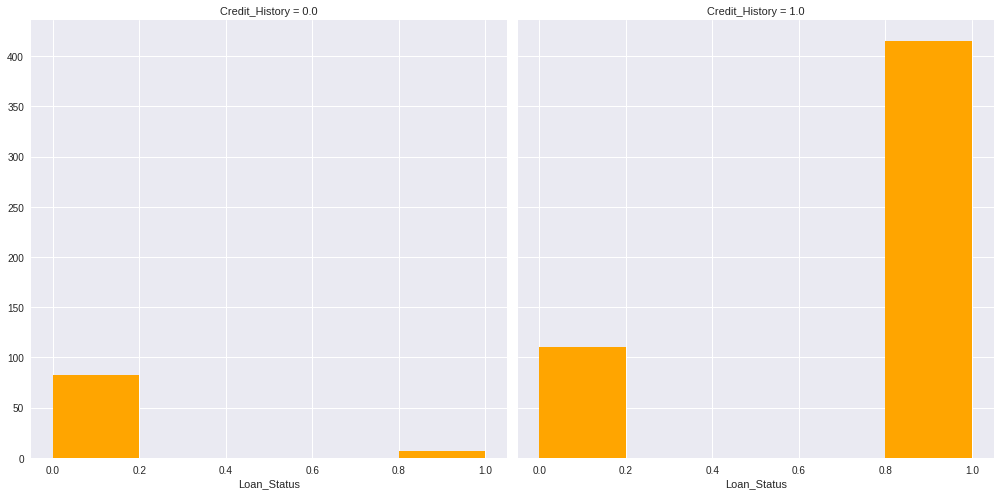

In [19]:
prob_loan = sbn.FacetGrid(df_train, col = "Credit_History", size = 7)
prob_loan.map(plt.hist, "Loan_Status", bins = 5, color = "orange")

The graph above shows that the probability of getting a loan are very high if the applicant has a valid credit history.

### Applicant Income

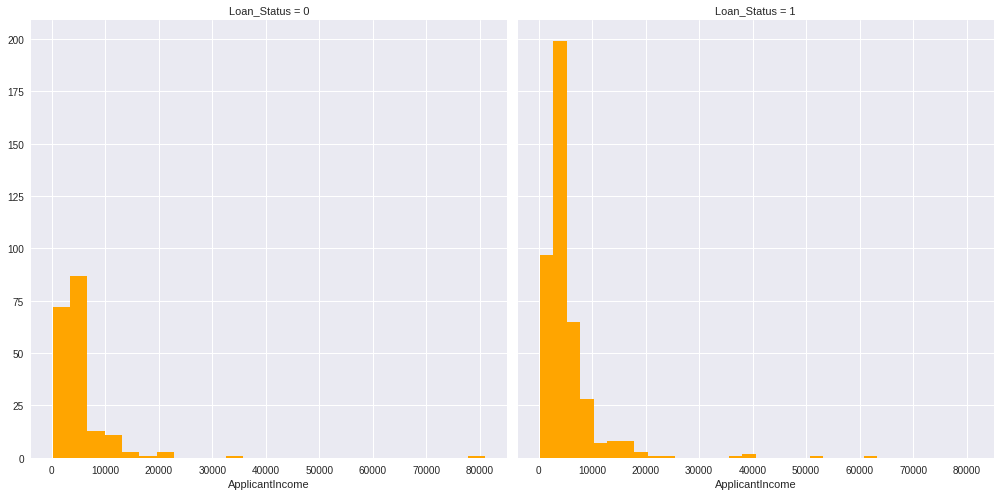

In [20]:
appincome = sbn.FacetGrid(df_train, col = "Loan_Status", size = 7)
appincome.map(plt.hist, "ApplicantIncome", bins = 25, color = "orange")

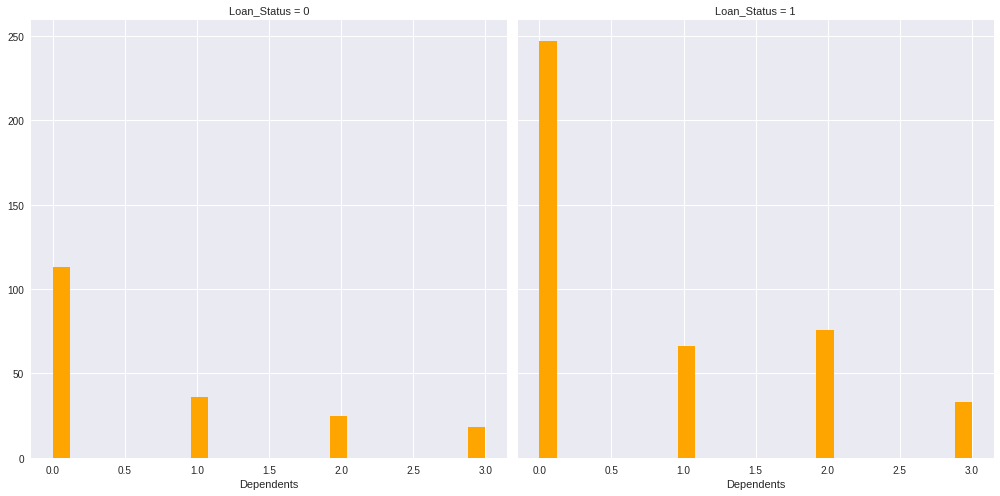

In [21]:
appincome = sbn.FacetGrid(df_train, col = "Loan_Status", size = 7)
appincome.map(plt.hist, "Dependents", bins = 25, color = "orange")

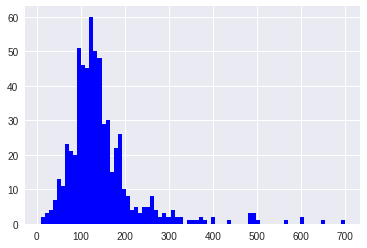

In [22]:
df_train["LoanAmount"].hist(bins = 75, color = "blue")

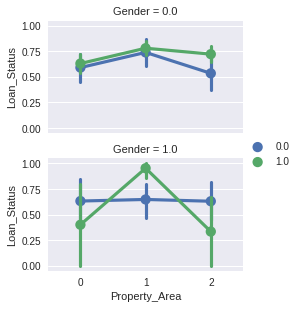

In [23]:
grid = sbn.FacetGrid(df_train, row='Gender', size=2.2, aspect=1.6)
grid.map(sbn.pointplot, 'Property_Area', 'Loan_Status', 'Married', palette='deep')
grid.add_legend()

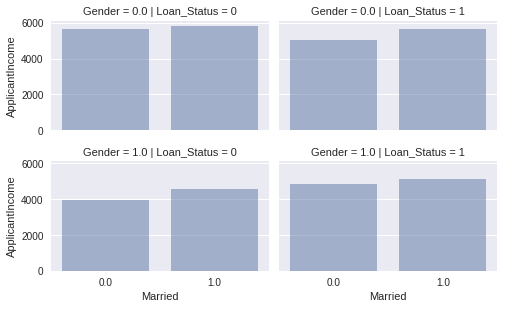

In [24]:
grid = sbn.FacetGrid(df_train, row='Gender', col='Loan_Status', size=2.2, aspect=1.6)
grid.map(sbn.barplot, 'Married', 'ApplicantIncome', alpha=.5, ci=None)
grid.add_legend()

## Step V - Create Predictive Models
After processing our data to a useful one for modeling, let's create some predictive models using algorithms below:
- Logistic Regression
- k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes Classifier
- Decision Tree
- Random Forrest
- Perceptron
- Stochastic Gradient Descent

In [25]:
# Import libraries for machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [26]:
# Fit Loan_ID before models
# le = preprocessing.LabelEncoder()

# le.fit(df_train["Loan_ID"])
# df_train['Loan_ID'] = le.transform(df_train['Loan_ID'])
# df_train['Loan_ID'] = le.inverse_transform(df_train['Loan_ID'])

# le.fit(df_test["Loan_ID"])
# df_test['Loan_ID'] = le.transform(df_test['Loan_ID'])
# df_train['Loan_ID'] = le.inverse_transform(df_train['Loan_ID'])

In [27]:
# Split the dataset into the training dataset and test dataset
x_train = df_train.drop(["Loan_Status"], axis = 1)
y_train = df_train["Loan_Status"]
x_test = df_test.drop(["Loan_ID"], axis = 1).copy()
x_train.shape, y_train.shape, x_test.shape

((614, 11), (614,), (367, 11))

In [28]:
display(x_train.head(10))
display(y_train.head(10))
display(x_test.head(10))

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2
5,0.0,1.0,2.0,1,1.0,5417,4196.0,267.000000,360.0,1.0,2
6,0.0,1.0,0.0,0,0.0,2333,1516.0,95.000000,360.0,1.0,2
7,0.0,1.0,3.0,1,0.0,3036,2504.0,158.000000,360.0,0.0,1
8,0.0,1.0,2.0,1,0.0,4006,1526.0,168.000000,360.0,1.0,2
9,0.0,1.0,1.0,1,0.0,12841,10968.0,349.000000,360.0,1.0,1


0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: Loan_Status, dtype: int64

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,0.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,0.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,0.0,1,2.0,1,0.0,2340,2546,100.0,360.0,1.0,2
4,0.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2
5,0.0,1,0.0,0,1.0,2165,3422,152.0,360.0,1.0,2
6,1.0,0,1.0,0,0.0,2226,0,59.0,360.0,1.0,1
7,0.0,1,2.0,0,0.0,3881,0,147.0,360.0,0.0,0
8,0.0,1,2.0,1,0.0,13633,0,280.0,240.0,1.0,2
9,0.0,0,0.0,0,0.0,2400,2400,123.0,360.0,1.0,1


### Logistic Regression

In [29]:
# Find the confidence score generated by Logistic Regression based on the training dataset.
logreg = LogisticRegression().fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score_logreg = logreg.score(x_train, y_train)*100
print("%.2f" % round(score_logreg, 2))

81.11


The calculated confidence score based on Logistic Regression is 81.11 percent.

In [30]:
# Calculate the coefficient of the features in the decision function.
coeff_df = pd.DataFrame(df_train.columns.delete(11))
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by = "Correlation", ascending = False)

,Feature,Correlation
9,Credit_History,3.193188
1,Married,0.363558
3,Education,0.293926
2,Dependents,0.018483
0,Gender,0.009872
10,Property_Area,0.006845
5,ApplicantIncome,0.000004
6,CoapplicantIncome,-0.000059
7,LoanAmount,-0.002028
8,Loan_Amount_Term,-0.004423


- Credit_History has the highest positivie coefficient, implying as the Credit_History value increases (0 to 1),  the probability of Loan_Status increases the most. In other words, having valid credit history inrease your chances to get approved for loan.
- Married and Education have the second and third highest positive correlation, respectively.
- Inversely the self employed applications are more likely to get disapproved for loan.

### k-Nearest Neighbors (k-NN)

In [31]:
## Find the confidence score generated by k-NN based on the training dataset.
knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
y_pred = knn.predict(x_test)
score_knn = knn.score(x_train, y_train)*100
print("%.2f" % round(score_knn, 2))

77.69


The calculated confidence score based on k-NN is 77.69 percent.

### Decision Tree

In [32]:
## Find the confidence score generated by Decision Tree based on the training dataset.
decision_tree = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
score_decision_tree = decision_tree.score(x_train, y_train)*100
print("%.2f" % round(score_decision_tree, 2))

100.00


The calculated confidence score based on Decision Tree is 100.00 percent.

### Gaussian Naive Bayes Classifier

In [33]:
## Find the confidence score generated by Gaussian Naive Bayes Classifier based on the training dataset.
nbc = GaussianNB().fit(x_train, y_train)
y_pred = nbc.predict(x_test)
score_nbc = nbc.score(x_train, y_train)*100
print("%.2f" % round(score_nbc, 2))

79.80


The calculated confidence score based on Gaussian Naive Bayes Classifier is 79.80 percent.

### Stochastic Gradient Descent

In [34]:
## Find the confidence score generated by Stochastic Gradient Descent based on the training dataset.
sgd = SGDClassifier().fit(x_train, y_train)
y_pred = sgd.predict(x_test)
score_sgd = sgd.score(x_train, y_train)*100
print("%.2f" % round(score_sgd, 2))

68.73


The calculated confidence score based on Stochastic Gradient Descent is 62.87 percent.

### Perceptron

In [35]:
## Find the confidence score generated by Perceptron based on the training dataset.
prcp = Perceptron().fit(x_train, y_train)
y_pred = prcp.predict(x_test)
score_prcp = prcp.score(x_train, y_train)*100
print("%.2f" % round(score_prcp, 2))

69.22


The calculated confidence score based on Perceptron is 69.22 percent.

### Random Forests

In [36]:
## Find the confidence score generated by Random Forests based on the training dataset.
randf = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)
y_pred = randf.predict(x_test)
score_randf = randf.score(x_train, y_train)*100
print("%.2f" % round(score_randf, 2))

100.00


The calculated confidence score based on Random Forests is 100.00 percent.

### Model Evaluation

In [37]:
models = pd.DataFrame({"Model": ["Logistic Regression", "k-Nearest Neighbors", "Naive Bayes Classifier", "Decision Tree", "Random Forests", "Perceptron", "Stochastic Gradient Descent"], "Score": [score_logreg, score_knn, score_nbc, score_decision_tree, score_randf, score_prcp, score_sgd]})
models.Score = round(models.Score, 2)
models.sort_values(by = "Score", ascending = False)

,Model,Score
3,Decision Tree,100.00
4,Random Forests,100.00
0,Logistic Regression,81.11
2,Naive Bayes Classifier,79.80
1,k-Nearest Neighbors,77.69
5,Perceptron,69.22
6,Stochastic Gradient Descent,68.73


Based on the scores above, the best choice of model is Random Forests. Even though their scores are same, Random Forests is a better option since Decision Tree has overfitting issue.

In [38]:
y_pred = y_pred.astype(str)
y_pred[y_pred == "0"] = "N"
y_pred[y_pred == "1"] = "Y"
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

## Step VI - Submission

In [39]:
submission = pd.DataFrame({"Loan_ID": df_test["Loan_ID"], "Loan_Status": y_pred})
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [40]:
submission.to_csv("sample_submission.csv", index = False)

## References

https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/ <br>
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/ <br>
https://machinelearningmastery.com/handle-missing-data-python/